# **Finding Duplicates Lab**


Estimated time needed: **30** minutes


## Introduction


Data wrangling is a critical step in preparing datasets for analysis, and handling duplicates plays a key role in ensuring data accuracy. In this lab, you will focus on identifying and removing duplicate entries from your dataset. 


## Objectives


In this lab, you will perform the following:


1. Identify duplicate rows in the dataset and analyze their characteristics.
2. Visualize the distribution of duplicates based on key attributes.
3. Remove duplicate values strategically based on specific criteria.
4. Outline the process of verifying and documenting duplicate removal.


## Hands on Lab


Install the needed library


In [2]:
!pip install pandas
!pip install matplotlib

Import pandas module


In [3]:
import pandas as pd


Import matplotlib


In [4]:
import matplotlib.pyplot as plt


## **Load the dataset into a dataframe**


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


In [22]:
# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head(10))

   ResponseId                                         MainBranch  \
0           1                     I am a developer by profession   
1           2                     I am a developer by profession   
2           3                     I am a developer by profession   
3           4                              I am learning to code   
4           5                     I am a developer by profession   
5           6                        I code primarily as a hobby   
6           7  I am not primarily a developer, but I write co...   
7           8                              I am learning to code   
8           9                        I code primarily as a hobby   
9          10                     I am a developer by profession   

                  Age                                         Employment  \
0  Under 18 years old                                Employed, full-time   
1     35-44 years old                                Employed, full-time   
2     45-54 years old  

Load the data into a pandas dataframe:



Note: If you are working on a local Jupyter environment, you can use the URL directly in the pandas.read_csv() function as shown below:



In [6]:
# df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


In [30]:
df.columns

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)

## Identify and Analyze Duplicates


### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.


In [8]:
## Write your code here
duplicate_rows_count = df.duplicated().sum()
print(f'Duplicate rows: {duplicate_rows_count}')

Duplicate rows: 20


In [46]:
df['Age'].value_counts()

Age
25-34 years old       23913
35-44 years old       14948
18-24 years old       14105
45-54 years old        6251
55-64 years old        2575
Under 18 years old     2570
65 years or older       773
Prefer not to say       322
Name: count, dtype: int64

### Task 2: Analyze Characteristics of Duplicates
1. Identify duplicate rows based on selected columns such as MainBranch, Employment, and RemoteWork. Analyse which columns frequently contain identical values within these duplicate rows.
2. Analyse the characteristics of rows that are duplicates based on a subset of columns, such as MainBranch, Employment, and RemoteWork. Determine which columns frequently have identical values across these rows.
   


In [13]:
## Write your code here
# cek duplikat berdasarkan subset
duplicates_subset = df[df.duplicated(subset=['MainBranch','Employment','RemoteWork'], keep=False)]

print("Jumlah baris duplikat (berdasarkan subset):", len(duplicates_subset))
#print(duplicates_subset.head())


Jumlah baris duplikat (berdasarkan subset): 65290


In [19]:
# hitung jumlah unique values per kolom dalam duplikat
unique_counts = duplicates_subset.nunique()

print("Jumlah unique value tiap kolom pada duplikat:")
print(unique_counts)

#Output dibawah menyajikan : Ada 5 variasi unik pada MainBranch dalam baris duplikat.

#misal jika ditelaah lagi example : I am a developer by profession muncul paling banyak (paling sering terduplikasi).
#selain itu ada I code primarily as a hobby yang juga variasi dari main brach column

Jumlah unique value tiap kolom pada duplikat:
ResponseId             65270
MainBranch                 5
Age                        8
Employment                72
RemoteWork                 3
                       ...  
JobSatPoints_11           79
SurveyLength               3
SurveyEase                 3
ConvertedCompYearly     6109
JobSat                    11
Length: 114, dtype: int64


In [43]:
print(df[['MainBranch', 'Country', 'Age']].head(5))

                       MainBranch  \
0  I am a developer by profession   
1  I am a developer by profession   
2  I am a developer by profession   
3           I am learning to code   
4  I am a developer by profession   

                                             Country                 Age  
0                           United States of America  Under 18 years old  
1  United Kingdom of Great Britain and Northern I...     35-44 years old  
2  United Kingdom of Great Britain and Northern I...     45-54 years old  
3                                             Canada     18-24 years old  
4                                             Norway     18-24 years old  


### Task 3: Visualize Duplicates Distribution
1. Create visualizations to show the distribution of duplicates across different categories.
2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.


In [25]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [26]:
## Write your code here
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df['Country'].value_counts()

Country
United States of America                                11099
Germany                                                  4949
India                                                    4232
United Kingdom of Great Britain and Northern Ireland     3227
Ukraine                                                  2672
                                                        ...  
Micronesia, Federated States of...                          1
Nauru                                                       1
Chad                                                        1
Djibouti                                                    1
Solomon Islands                                             1
Name: count, Length: 185, dtype: int64

/tmp/ipykernel_1501/2601898524.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette="viridis")


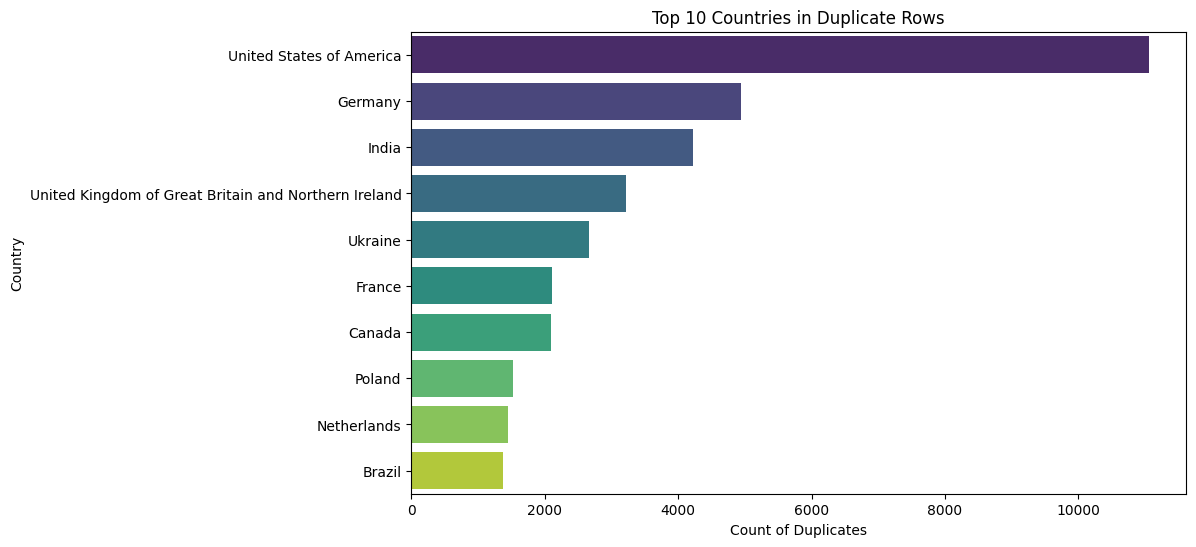

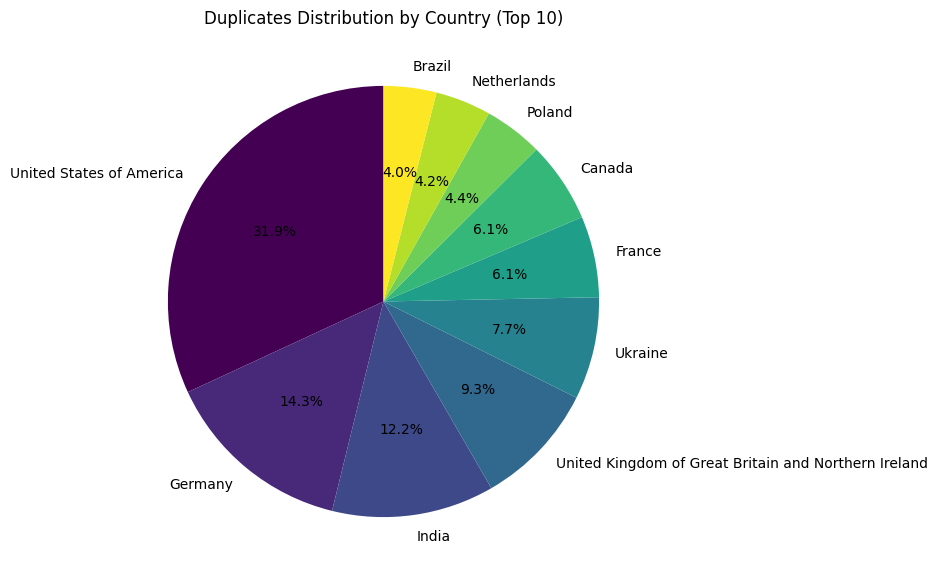

In [36]:


# hitung frekuensi per Country
country_counts = duplicates_subset['Country'].value_counts().head(10)  # ambil 10 teratas biar rapi

# bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=country_counts.values, y=country_counts.index, palette="viridis")
plt.title("Top 10 Countries in Duplicate Rows")
plt.xlabel("Count of Duplicates")
plt.ylabel("Country")
plt.show()

# pie chart
plt.figure(figsize=(7,7))
country_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap="viridis")
plt.ylabel("")
plt.title("Duplicates Distribution by Country (Top 10)")
plt.show()


/tmp/ipykernel_1501/2228928054.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=employment_counts.values, y=employment_counts.index, palette="plasma")


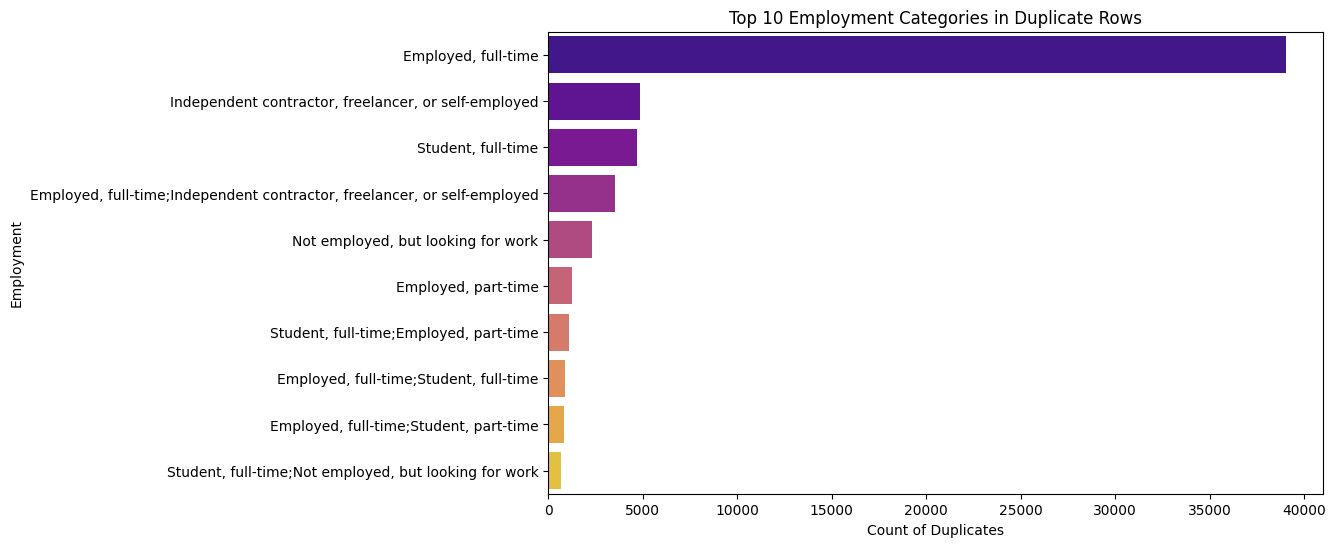

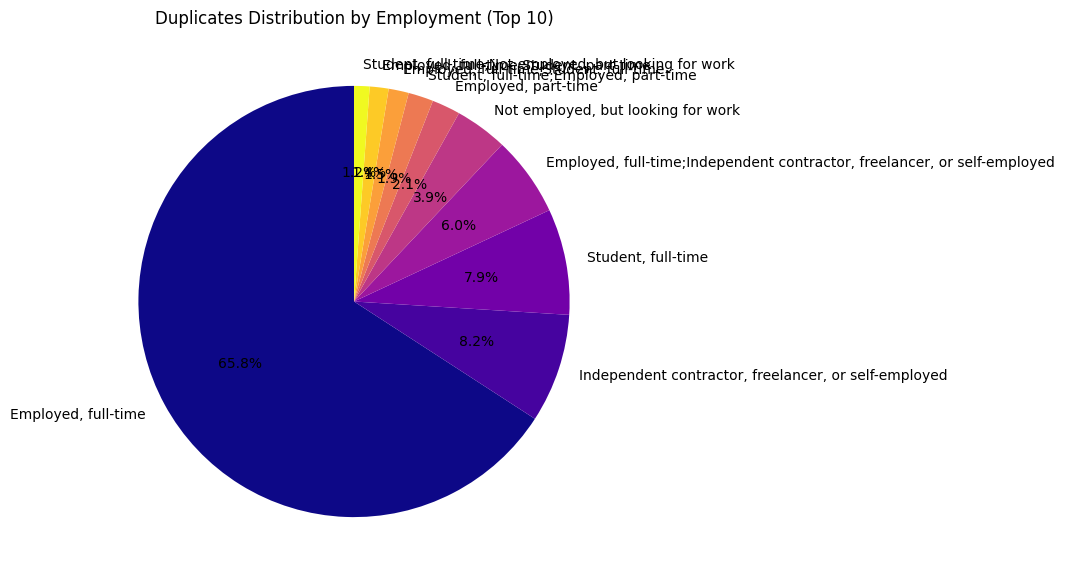

In [28]:
# hitung frekuensi per Employment
employment_counts = duplicates_subset['Employment'].value_counts().head(10)

# bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=employment_counts.values, y=employment_counts.index, palette="plasma")
plt.title("Top 10 Employment Categories in Duplicate Rows")
plt.xlabel("Count of Duplicates")
plt.ylabel("Employment")
plt.show()

# pie chart
plt.figure(figsize=(7,7))
employment_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap="plasma")
plt.ylabel("")
plt.title("Duplicates Distribution by Employment (Top 10)")
plt.show()


### Task 4: Strategic Removal of Duplicates
1. Decide which columns are critical for defining uniqueness in the dataset.
2. Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.


In [50]:
## Write your code here
# hapus duplikat hanya berdasarkan subset kolom tertentu yang tidak terlalu berdampak pada data yang ingin dianalisis. Sebagai contoh kita ambil 
# mainbranch, employment dan remotework
df_unique = df.drop_duplicates(subset=['MainBranch','Employment','RemoteWork'], keep='first')

print("Jumlah baris sebelum:", len(df))
print("Jumlah baris setelah hapus duplikat:", len(df_unique))


Jumlah baris sebelum: 65457
Jumlah baris setelah hapus duplikat: 561


## Verify and Document Duplicate Removal Process


### Task 5: Documentation
1. Document the process of identifying and removing duplicates.


2. Explain the reasoning behind selecting specific columns for identifying and removing duplicates.


### Summary and Next Steps
**In this lab, you focused on identifying and analyzing duplicate rows within the dataset.**

- You employed various techniques to explore the nature of duplicates and applied strategic methods for their removal.
- For additional analysis, consider investigating the impact of duplicates on specific analyses and how their removal affects the results.
- This version of the lab is more focused on duplicate analysis and handling, providing a structured approach to deal with duplicates in a dataset effectively.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11- 05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|
--!>
